In [44]:
import numpy as np

# 矩阵运算
# a = np.arange(10).reshape((5, 2))
# # b = np.array([1, 2])
# # a / b
# print(a)
# a - a.mean(axis=0)

# 矩阵拼接，上下拼接
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b))

# zip打包元组,与最短的一致
a = [1, 2, 3]
b = [4, 5, 6]
list(zip(a, b))

# 矩阵双除法
a = np.array(a)
b = np.array(b)
a / b

array([0.25, 0.4 , 0.5 ])

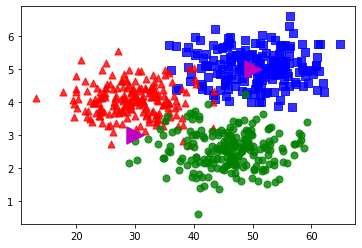

In [51]:
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
# normal是正态分布的意思
# numpy.random.normal(loc=0,scale=1e-2,size=shape)
# 均值，标准差，尺寸
x1 = np.random.normal(50, 6, 200)
y1 = np.random.normal(5, 0.5, 200)

x2 = np.random.normal(30, 6, 200)
y2 = np.random.normal(4, 0.5, 200)

x3 = np.random.normal(45, 6, 200)
y3 = np.random.normal(2.5, 0.5, 200)


plt.scatter(x1, y1, c='b', marker='s', s=50, alpha=0.8)
plt.scatter(x2, y2, c='r', marker='^', s=50, alpha=0.8)
plt.scatter(x3, y3, c='g', s=50, alpha=0.8)

# 矩阵拼接，上下拼接
x_val = np.concatenate((x1, x2, x3))
y_val = np.concatenate((y1, y2, y3))

x_diff = max(x_val) - min(x_val)
y_diff = max(y_val) - min(y_val)

x_normalized = [x / x_diff for x in x_val]
# xx = x_val / x_diff
y_normalized = [y / y_diff for y in y_val]

# 打包成元组，(x, y)
xy_normalized = list((zip(x_normalized, y_normalized)))

# 列表类型的乘法与加法
labels = [1] * 200 + [2] * 200 + [3] * 200
# print(labels)


clf = neighbors.KNeighborsClassifier(30)
clf.fit(xy_normalized, labels)
# print(xy_normalized)

new1 = np.array([50, 5])
new2 = np.array([30, 3])

new1 = new1 / np.array([x_diff, y_diff])
new2 = new2 / np.array([x_diff, y_diff])

pre = clf.predict([new1, new2])

new1 = new1 * np.array([x_diff, y_diff])
new2 = new2 * np.array([x_diff, y_diff])
plt.scatter(new1[0], new1[1], c='m', marker='>', s=300)
plt.scatter(new2[0], new2[1], c='m', marker='>', s=300)




In [69]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# 给数据打标签
def give_label(df):
    y = np.zeros(len(df))
    for i in range(len(df)):
        if df[i, -1] > 50:
            y[i] = 1
        else:
            y[i] = 0
    return y


def main():
    # 取前17个样本
    n = 17
    # 6 列
    m = 6
    data = pd.read_excel(r"D:\Programing\pythonProject\临时\DZK-AA数据.xlsx", sheet_name='数据汇总')
    df = data.iloc[0:n, 2:2+m]
    # print(df)
    df = np.array(df) 

    # 所有行，从第一列到倒数第二列
    X = df[:, 0:m-1]
    y = give_label(df)

    max_val = X.max(axis=0)
    min_val = X.min(axis=0)
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # weights是所有点的权重
    # metri是距离的方式
    knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
    knn.fit(X, y)

    nx = np.array([[56.87, 38.56, 1.83, 3.96, 868], [51.95, 38.29, 1.87, 3.98, 754],
          [52.90, 38.46, 1.73, 3.88, 519], [53.85, 39.33, 1.75, 3.71, 639]])

    nx = (nx - mean) / std

    # 预测分类
    print(knn.predict(nx))
    # 预测分类的概率
    print(knn.predict_proba(nx))
    # 预测正确率
    print(knn.score(nx, [0, 0, 1, 1]))


main()


[0. 0. 0. 0.]
[[0.82220484 0.17779516]
 [1.         0.        ]
 [0.80560764 0.19439236]
 [0.81970996 0.18029004]]
0.5


[1 3 0 3 0 3 1 3 2 2 3 2 3 1 2 2 0 2 3 3 1 3 3 3 2 0 3 0 2 3 3 1 1 3 1 3 1
 0 1 0 0 3 0 3 1 0 2 1 3 0 0 1 3 0 2 0 0 3 3 3 0 0 1 3 0 1 2 2 3 1 1 1 1 3
 1 2 3 2 3 2 1 2 2 0 1 1 1 2 2 1 3 3 2 2 0 1 1 0 3 2]
[[0.20738929 0.71320279]
 [0.71949246 0.27908676]
 [0.74810624 0.76410073]
 [0.23215661 0.25822111]]
4.068429432123485


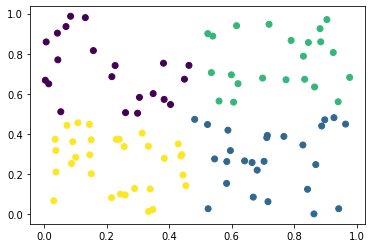

In [81]:
# K-means
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 产生0-1之间的小数，长和宽
data = np.random.rand(100, 2)
kms = KMeans(n_clusters=4)
kms.fit(data)

# 分类的标签
print(kms.labels_)
# 聚类中心
print(kms.cluster_centers_)
# 聚类准则的总和
# 样本到其最近的聚类中心的距离的平方之和。
print(kms.inertia_)

plt.scatter(data[:, 0], data[:, 1], c=kms.labels_)

In [84]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

def main():
    n = 17
    m = 6
    data = pd.read_excel(r"D:\Programing\pythonProject\临时\DZK-AA数据.xlsx", sheet_name='数据汇总')
    df = data.iloc[0:n, 2:2 + m]
    df = np.array(df)
    
    X = df[:, 0:m-1]
    
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    kms = KMeans(n_clusters=2)
    kms.fit(X)

    print(kms.labels_)
    print(kms.cluster_centers_)

    print(kms.inertia_)
    # 迭代次数
    print(kms.n_iter_)

    nx = np.array([[56.87, 38.56, 1.83, 3.96, 868], [51.95, 38.29, 1.87, 3.98, 754],
                   [52.90, 38.46, 1.73, 3.88, 519], [53.85, 39.33, 1.75, 3.71, 639]])
    nx = (nx - mean) / std
    print(kms.predict(nx))

main()

[0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0]
[[ 0.09865515  0.41683259 -0.3387424  -0.44966204 -0.52172504]
 [-0.18086778 -0.76419309  0.62102773  0.82438041  0.95649591]]
60.91995902075328
2
[0 0 0 0]


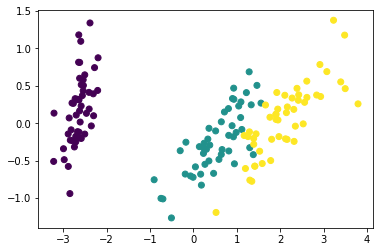

In [89]:
# PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data
# 要降低到的维度
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=y)

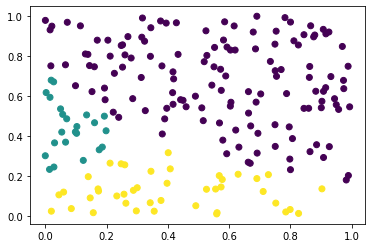

In [146]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

X = np.random.random((200, 2))

def dis(x1, x2):
    return np.sqrt(sum((x1 - x2) * (x1 - x2)))

a = np.array([1, 2])
b = np.array([1, 3])

def kmeans(X, k):
    n, m = X.shape
    # print(n, m)
    # print(dis(a, b))

    label = np.zeros(n)
    center = np.zeros((k, m))
    for i in range(k):
        center[i] = X[i]
    # print(center)
    for t in range(400):
        for i in range(n):
            temp = np.zeros(k)
            for j in range(k):
                temp[j] = dis(X[i], center[j])
            label[i] = np.argmin(temp)

    return label


c = kmeans(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=c)

[[ 7.34771956e-04 -8.06637517e-04  1.90444173e-04  5.96825353e-04
   9.99999208e-01]
 [ 9.87706911e-01 -1.54430644e-01  1.44646958e-02  1.93974224e-02
  -8.64641165e-04]]
[9.99955014e-01 3.30661125e-05]
[2.58102982e+04 8.53484619e-01]
2
[ 53.05098039  38.40176471   1.81235294   4.12529412 801.58823529]
0.10255618843530669
17


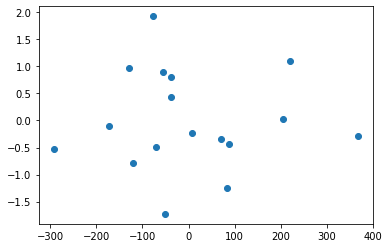

In [95]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


def main():
    n = 17
    m = 6
    data = pd.read_excel(r"D:\Programing\pythonProject\临时\DZK-AA数据.xlsx", sheet_name='数据汇总')
    df = data.iloc[0:n, 2:2 + m]
    df = np.array(df)

    X = df[:, 0: m - 1]

    pca = PCA(n_components=2)

    # 得到降维后的值
    newX = pca.fit_transform(X)


    # print(newX)
    # 特征空间的主轴，代表数据中最大方差的方向
    print(pca.components_)
    # 由每一个被选择的成分所解释的方差比列，
    print(pca.explained_variance_ratio_)

    # 方差
    print(pca.explained_variance_)

    print(pca.n_components_)

    # 等于X的协方差矩阵的最小特征值的平均值。
    print(pca.noise_variance_)

    print(pca.n_samples_)

    plt.scatter(newX[:, 0], newX[:, 1], marker='o')

main()


In [113]:
# 神经网络
from sklearn.neural_network import MLPClassifier

X = [[0., 0.], [1., 1.], [3, 3]]
y = [0, 1, 2]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, activation='relu')

clf.fit(X, y)

print(clf.predict([[3, 2], [-1, -2], [3, 3]]))

print(clf.predict_proba([[3, 2], [-1, -2], [3, 3]]))

print(clf.coefs_)

print('*'*100)
print(clf.intercepts_)

# 迭代次数
print(clf.n_iter_)
# 层数
print(clf.n_layers_)
# 输出个数
print(clf.n_outputs_)
# softmax
print(clf.out_activation_)

[1 0 2]
[[4.13169169e-01 5.78818016e-01 8.01281456e-03]
 [4.99999394e-01 4.99889949e-01 1.10657171e-04]
 [2.72505856e-08 1.91176190e-07 9.99999782e-01]]
[array([[-0.15077528, -0.4309988 , -0.90831787, -0.53719971, -0.6418627 ],
       [-0.74074173, -1.40142105, -0.2806241 , -0.36560664,  0.070532  ]]), array([[ 0.30974823, -0.15026142],
       [-5.56335405, -0.65343542],
       [-0.54856511,  0.54646834],
       [ 0.43950109, -0.33901786],
       [ 0.34946008,  0.68391844]]), array([[-2.49643316, -2.03348582,  3.64204333],
       [-0.86353993, -0.16961578,  0.9844461 ]])]
****************************************************************************************************
[array([-0.14962269,  4.72133432, -0.5472481 , -2.70341009, -0.87510813]), array([ 4.20855499, -0.76834882]), array([ 2.8350008 ,  2.83478189, -5.5809245 ])]
21
4
3
softmax


In [118]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier

def give_label(df):
    y = np.zeros(len(df))
    for i in range(len(df)):
        if df[i, -1] > 50:
            y[i] = 1
        else:
            y[i] = 0
    return y

def main():
    n = 22
    m = 6
    data = pd.read_excel(r"D:\Programing\pythonProject\临时\DZK-AA数据.xlsx", sheet_name='数据汇总')
    df = data.iloc[0:n, 2:2 + m]
    df = np.array(df)

    X = df[:, 0 : m - 1]
    y = give_label(df)

    print(X.shape)
    print(y.shape)

    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, activation='logistic') 
    clf.fit(X, y)

    nx = np.array([[56.87, 38.56, 1.83, 3.96, 868], [51.95,  38.29, 1.87, 3.98, 754],
          [52.90, 38.46, 1.73, 3.88, 519], [53.85, 39.33, 1.75, 3.71, 639]])

    print(clf.predict(nx))
    print(clf.predict_proba(nx))
    print(clf.out_activation_)
main()

(22, 5)
(22,)
[0. 0. 0. 0.]
[[0.68180133 0.31819867]
 [0.68180133 0.31819867]
 [0.68180133 0.31819867]
 [0.68180133 0.31819867]]
logistic


In [ ]:
from sklearn import neural_network
from sklearn.datasets import load_iris
import numpy as np
import sys

iris = load_iris()
mlp = neural_network.MLPClassifier(hidden_layer_sizes=(10), activation="relu",
                 solver='adam', alpha=0.0001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init=0.001, power_t=0.5, max_iter=200 ,tol=1e-4)
mlp.fit(iris.data,iris.target)
print(mlp.predict([[1,2,3,4]]))#预测结果
print(mlp.n_outputs_)#输出类别数
print(mlp.classes_)#所有类别
print(mlp.loss_)#损失函数的损失值
print(mlp.intercepts_)#偏移量
print(mlp.coefs_)#权重
print(mlp.n_iter_)#迭代轮数
print(mlp.n_layers_)#网络层数，只有一层隐藏层时 =3
print(mlp.out_activation_)#输出层激活函数的名称

In [ ]:
# ahp
import numpy as np

RI_dict = {1: 0, 2: 0, 3: 0.58, 4: 0.90, 5: 1.12, 6: 1.24, 7: 1.32, 8: 1.41, 9: 1.45}


def get_w(array):
    row = array.shape[0]  # 计算出阶数
    a_axis_0_sum = array.sum(axis=0)
    # print(a_axis_0_sum)
    b = array / a_axis_0_sum  # 新的矩阵b
    # print(b)
    b_axis_0_sum = b.sum(axis=0)
    b_axis_1_sum = b.sum(axis=1)  # 每一行的特征向量
    # print(b_axis_1_sum)
    w = b_axis_1_sum / row  # 归一化处理(特征向量)
    nw = w * row
    AW = (w * array).sum(axis=1)
    # print(AW)
    max_max = sum(AW / (row * w))
    # print(max_max)
    CI = (max_max - row) / (row - 1)
    CR = CI / RI_dict[row]
    if CR < 0.1:
        # print(round(CR, 3))
        # print('满足一致性')
        # print(np.max(w))
        # print(sorted(w,reverse=True))
        # print(max_max)
        # print('特征向量:%s' % w)
        return w
    else:
        print(round(CR, 3))
        print('不满足一致性，请进行修改')

#
def main(array):
    if type(array) is np.ndarray:
        return get_w(array)
    else:
        print('请输入numpy对象')


if __name__ == '__main__':
    # 由于地方问题，矩阵我就写成一行了
    e = np.array([[1, 2, 7, 5, 5], [1 / 2, 1, 4, 3, 3], [1 / 7, 1 / 4, 1, 1 / 2, 1 / 3], [1 / 5, 1 / 3, 2, 1, 1], [1 / 5, 1 / 3, 3, 1, 1]])
    a = np.array([[1, 1 / 3, 1 / 8], [3, 1, 1 / 3], [8, 3, 1]])
    b = np.array([[1, 2, 5], [1 / 2, 1, 2], [1 / 5, 1 / 2, 1]])
    c = np.array([[1, 1, 3], [1, 1, 3], [1 / 3, 1 / 3, 1]])
    d = np.array([[1, 3, 4], [1 / 3, 1, 1], [1 / 4, 1, 1]])
    f = np.array([[1, 4, 1 / 2], [1 / 4, 1, 1 / 4], [2, 4, 1]])
    e = main(e)
    a = main(a)
    b = main(b)
    c = main(c)
    d = main(d)
    f = main(f)
    try:
        res = np.array([a, b, c, d, f])
        ret = (np.transpose(res) * e).sum(axis=1)
        print(ret)
    except TypeError:
        print('数据有误，可能不满足一致性，请进行修改')

In [149]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews

 #定义一个用于提取特征的函数
def extract_features(word_list):
    return dict([(word, True) for word in word_list])


 #我们需要训练数据，这里将用NLTK提供的电影评论数据
if __name__=='__main__':
    # 加载积极与消极评论 
    positive_fileids = movie_reviews.fileids('pos')
    negative_fileids = movie_reviews.fileids('neg')

    #将这些评论数据分成积极评论和消极评论 
    features_positive = [(extract_features(movie_reviews.words(fileids=[f])), 
            'Positive') for f in positive_fileids]
    features_negative = [(extract_features(movie_reviews.words(fileids=[f])), 
            'Negative') for f in negative_fileids]

    #分成训练数据集（80%）和测试数据集（20%）
    threshold_factor = 0.8
    threshold_positive = int(threshold_factor * len(features_positive))
    threshold_negative = int(threshold_factor * len(features_negative))
     #提取特征
    features_train = features_positive[:threshold_positive] + features_negative[:threshold_negative]
    features_test = features_positive[threshold_positive:] + features_negative[threshold_negative:]  
    print ("\nNumber of training datapoints:", len(features_train))
    print ("Number of test datapoints:", len(features_test))

    #训练朴素贝叶斯分类器
    classifier = NaiveBayesClassifier.train(features_train)
    print ("\nAccuracy of the classifier:", nltk.classify.util.accuracy(classifier, features_test))

    print ("\nTop 10 most informative words:")
    for item in classifier.most_informative_features()[:10]:
        print (item[0])

    # 输入一些简单的评论
    input_reviews = [
        "It is an amazing movie", 
        "This is a dull movie. I would never recommend it to anyone.",
        "The cinematography is pretty great in this movie", 
        "The direction was terrible and the story was all over the place" 
    ]
#运行分类器，获得预测结果
    print("\nPredictions:")
    for review in input_reviews:
        print("\nReview:", review)
        probdist = classifier.prob_classify(extract_features(review.split()))
        pred_sentiment = probdist.max()
        #打印输出
        print("Predicted sentiment:", pred_sentiment) 
        print("Probability:", round(probdist.prob(pred_sentiment), 2))




Number of training datapoints: 1600
Number of test datapoints: 400

Accuracy of the classifier: 0.735

Top 10 most informative words:
outstanding
insulting
vulnerable
ludicrous
uninvolving
astounding
avoids
fascination
affecting
animators

Predictions:

Review: It is an amazing movie
Predicted sentiment: Positive
Probability: 0.61

Review: This is a dull movie. I would never recommend it to anyone.
Predicted sentiment: Negative
Probability: 0.77

Review: The cinematography is pretty great in this movie
Predicted sentiment: Positive
Probability: 0.67

Review: The direction was terrible and the story was all over the place
Predicted sentiment: Negative
Probability: 0.63


error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'
